# Warehouse Inventory assessment
*This notebook illustrates how to assess the inventory position of a storage system.
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [ ]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [ ]:
string_casestudy = 'TOY_DATA'

### Import data

In [ ]:
# %% import data
from logproj.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [ ]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH2,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH2,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH2,AREA 1,3,0,0,2400,0,0,2
0,1,FAKE,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH2,AREA 1,5,0,0,4800,0,0,4


,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH2,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH2,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH2,AREA 1,3,0,0,2400,0,0,2
0,1,FAKE,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH2,AREA 1,5,0,0,4800,0,0,4


In [ ]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,32.768637,0.279408
0,1,PRODOTTO_1,16.503677,6.422934
0,2,PRODOTTO_2,5.277076,6.210092
0,3,PRODOTTO_3,61.280400,1.348865
0,4,PRODOTTO_4,17.074509,9.768028


,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,32.768637,0.279408
0,1,PRODOTTO_1,16.503677,6.422934
0,2,PRODOTTO_2,5.277076,6.210092
0,3,PRODOTTO_3,61.280400,1.348865
0,4,PRODOTTO_4,17.074509,9.768028


In [ ]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,88,1,LOGICAL_WH2,AREA 1,308,0,61,2,0,48800,2400,517,517,11.250808,1112.937886,86.575468,2020-01-02 01:51:49.210173,,PICKING
0,44,1,LOGICAL_WH2,AREA 1,1233,3,48,2,12000,38400,2400,127,127,5.276884,167.011362,23.657978,2020-01-02 01:55:00.291913,-,OTHER
0,77,1,LOGICAL_WH2,AREA 1,355,1,4,4,4000,3200,4800,507,507,36.278123,301.774257,192.477221,2020-01-02 02:15:35.103779,,PUTAWAY
0,99,1,FAKE,AREA 1,611,1,56,0,4000,44800,0,698,698,20.972749,1680.890031,89.110782,2020-01-02 02:46:12.350212,+,PICKING
0,98,1,FAKE,AREA 1,886,2,45,0,8000,36000,0,300,300,1.479022,137.842238,11.190510,2020-01-02 03:54:13.629270,+,PUTAWAY


,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,88,1,LOGICAL_WH2,AREA 1,308,0,61,2,0,48800,2400,517,517,11.250808,1112.937886,86.575468,2020-01-02 01:51:49.210173,,PICKING
0,44,1,LOGICAL_WH2,AREA 1,1233,3,48,2,12000,38400,2400,127,127,5.276884,167.011362,23.657978,2020-01-02 01:55:00.291913,-,OTHER
0,77,1,LOGICAL_WH2,AREA 1,355,1,4,4,4000,3200,4800,507,507,36.278123,301.774257,192.477221,2020-01-02 02:15:35.103779,,PUTAWAY
0,99,1,FAKE,AREA 1,611,1,56,0,4000,44800,0,698,698,20.972749,1680.890031,89.110782,2020-01-02 02:46:12.350212,+,PICKING
0,98,1,FAKE,AREA 1,886,2,45,0,8000,36000,0,300,300,1.479022,137.842238,11.190510,2020-01-02 03:54:13.629270,+,PUTAWAY


In [ ]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,861,15.844876,2020-01-02
0,1,FAKE,1,1470,5.929334,2020-01-02
0,1,LOGICAL_WH1,2,716,1.339565,2020-01-02
0,1,FAKE,3,301,36.607449,2020-01-02
0,1,LOGICAL_WH2,4,140,23.218788,2020-01-02


,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,861,15.844876,2020-01-02
0,1,FAKE,1,1470,5.929334,2020-01-02
0,1,LOGICAL_WH1,2,716,1.339565,2020-01-02
0,1,FAKE,3,301,36.607449,2020-01-02
0,1,LOGICAL_WH2,4,140,23.218788,2020-01-02


### Create folder hierarchy

In [ ]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, path_results = creaCartella(root_path,f"P8_warehouseAssessment")

Cartella TOY_DATA_results già esistente
Cartella P8_warehouseAssessment già esistente
Cartella TOY_DATA_results già esistente
Cartella P8_warehouseAssessment già esistente


### Set the columns name

In [ ]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [ ]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [ ]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Generate the inventory curve for each SKU

In [ ]:
# generate the inventory curve for each SKU
from logproj.information_framework import updatePartInventory
D_SKUs= updatePartInventory(D_SKUs,D_movements,D_inventory,timecolumn_mov,itemcodeColumns_sku,itemcodeColumns_mov,itemcodeColumns_inv) 


..\logproj\information_framework.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['INOUT'].astype(str) + D_movements[quantityColums].astype(str)
..\logproj\information_framework.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT']=D_movements['MOVEMENT'].astype(float)
..\logproj\information_framework.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Cartella Inventory già esistente
Cartella Inventory già esistente


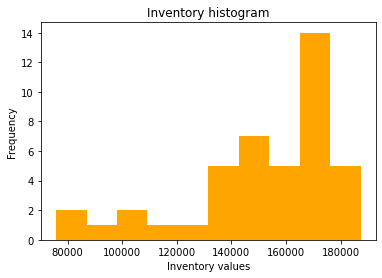

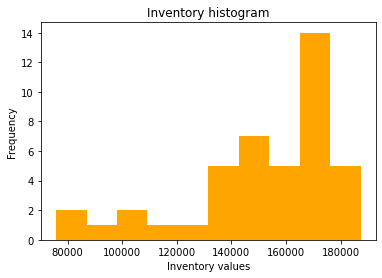

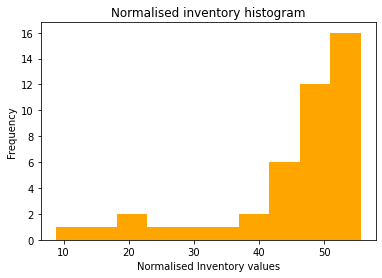

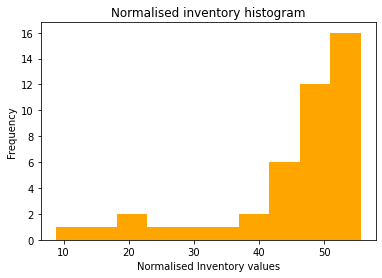

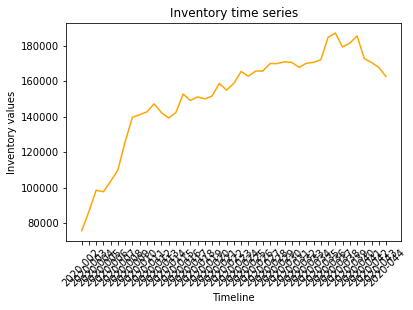

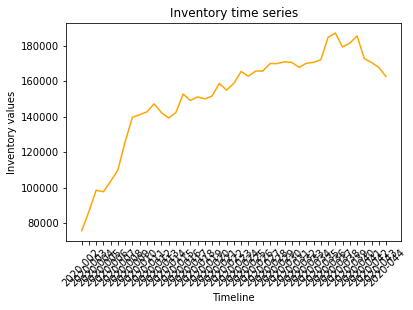

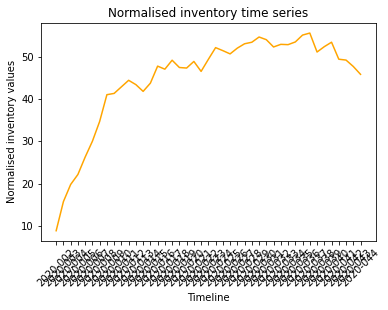

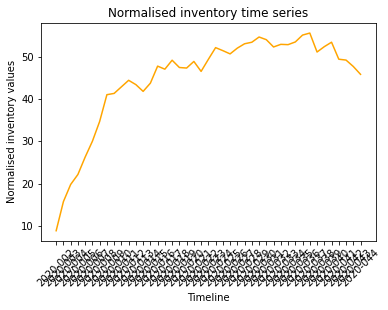

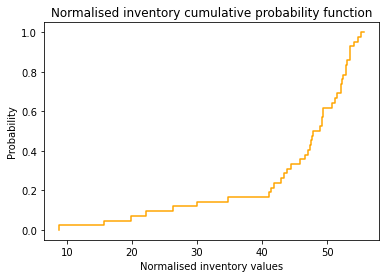

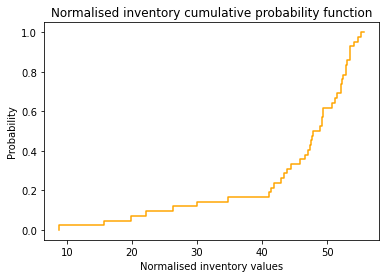

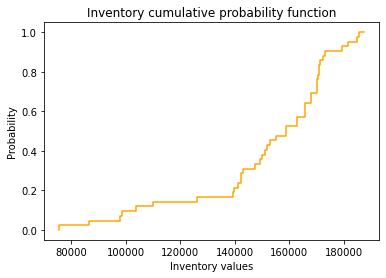

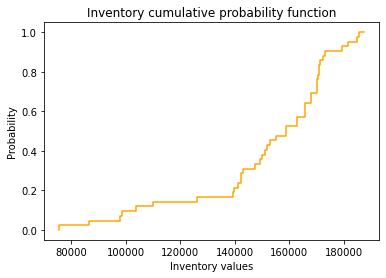

In [ ]:
# %% update global inventory
from logproj.P8_performanceAssessment.wh_inventory_assessment import updateGlobalInventory

_, path_current = creaCartella(path_results,f"Inventory")

D_global_inventory = updateGlobalInventory(D_SKUs,inventoryColumn='INVENTORY_QTY')
D_global_inventory.to_excel(path_current+"\\global inventory.xlsx")

        
# %% analyse the inventory behaviour
from logproj.P8_performanceAssessment.wh_inventory_assessment import inventoryAnalysis

output_figures = inventoryAnalysis(D_global_inventory)

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 
        

### INVENTORY design

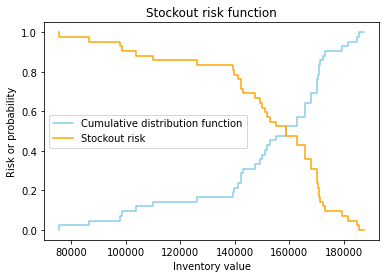

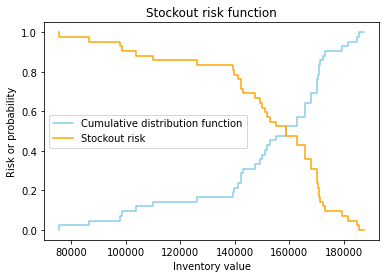

In [ ]:
from logproj.P8_performanceAssessment.wh_inventory_assessment import defineStockoutCurve

output_figure = defineStockoutCurve(D_global_inventory['WH_INVENTORY_VOLUME'])
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 